In [1]:
import os
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import string

In [3]:
X = [] # An array of pair which will store (filename,data)
Y = [] # An array storing category corresponding to a filename

for category in os.listdir('20_newsgroups'):
    for document in os.listdir('20_newsgroups/'+category):
        with open('20_newsgroups/'+category+'/'+document, "r" ,encoding="ISO-8859-1") as f:
            X.append((document,f.read()))
            Y.append(category)

In [4]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size = 0.25,random_state = 0)

In [5]:
stopwords = ['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone',
             'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount',
             'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around',
             'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before',
             'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both',
             'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de',
             'describe', 'detail', 'did', 'do', 'does', 'doing', 'don', 'done', 'down', 'due', 'during', 'each', 'eg',
             'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone',
             'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify', 'fill', 'find', 'fire', 'first', 'five', 'for',
             'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had',
             'has', 'hasnt', 'have', 'having', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed',
             'interest', 'into', 'is', 'it', 'its', 'itself', 'just', 'keep', 'last', 'latter', 'latterly', 'least', 'less',
             'ltd', 'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly',
             'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine',
             'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once',
             'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own',
             'part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed', 'seeming',
             'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so', 
             'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system',
             't', 'take', 'ten', 'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there',
             'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thickv', 'thin', 'third', 'this',
             'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward',
             'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'we',
             'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby',
             'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom',
             'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself',
             'yourselves']

In [6]:
dictionary = {} # to store the count of every word present in our training set.
for i in range(len(X_train)):
    word_list = []
    for word in X_train[i][1].split():
        word_new  = word.strip(string.punctuation).lower()
        if (len(word_new)>2)  and (word_new not in stopwords):  
            if word_new in dictionary:
                dictionary[word_new]+=1
            else:
                dictionary[word_new]=1  

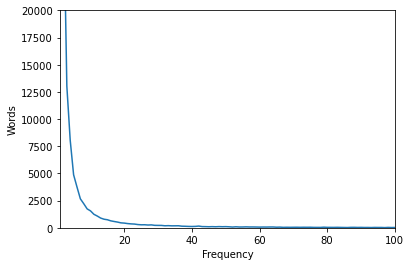

In [7]:
num_words = [0 for i in range(max(dictionary.values())+1)] 
freq = [i for i in range(max(dictionary.values())+1)] 
for key in dictionary:
    num_words[dictionary[key]]+=1
plt.plot(freq,num_words)
plt.axis([1, 100, 0, 20000])
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

In [8]:
cutoff_freq = 70 # Not including words whose frequency is less than 70
features = []
for key in dictionary:
    if dictionary[key] >=cutoff_freq:
        features.append(key)

In [9]:
Xtrain_data = np.zeros((len(X_train),len(features))) #for storing training data as frequencies of words present in dictionary

for i in range(len(X_train)):
    wordlis = [ word.strip(string.punctuation).lower() for word in X_train[i][1].split()] # Converting a individual file as a list of words
    
    for word in wordlis:
        if word in features: # Checking whether a word is present in features list 
            Xtrain_data[i][features.index(word)] += 1 # if present then increment the value by 1.

In [10]:
#Same for test data also.
Xtest_data = np.zeros((len(X_test),len(features)))
for i in range(len(X_test)):
    wordlis = [ word.strip(string.punctuation).lower() for word in X_test[i][1].split()]   
    for word in wordlis:
        if word in features:
            Xtest_data[i][features.index(word)] += 1

In [11]:
model = MultinomialNB()  # Using Sklearn fitting and predicting the value.
model.fit(Xtrain_data,Y_train)
pred = model.predict(Xtest_data)

score_train_sklearn = model.score(Xtrain_data,Y_train)
score_test_sklearn = model.score(Xtest_data,Y_test)

print(score_train_sklearn)
print(score_test_sklearn)

print(classification_report(Y_test,pred))

0.9077815563112622
0.8666
                          precision    recall  f1-score   support

             alt.atheism       0.74      0.85      0.79       232
           comp.graphics       0.82      0.77      0.80       253
 comp.os.ms-windows.misc       0.85      0.83      0.84       259
comp.sys.ibm.pc.hardware       0.84      0.83      0.84       249
   comp.sys.mac.hardware       0.87      0.90      0.88       236
          comp.windows.x       0.89      0.91      0.90       281
            misc.forsale       0.80      0.89      0.84       253
               rec.autos       0.89      0.91      0.90       233
         rec.motorcycles       0.94      0.98      0.96       271
      rec.sport.baseball       0.98      0.98      0.98       245
        rec.sport.hockey       1.00      0.98      0.99       243
               sci.crypt       0.95      0.88      0.91       234
         sci.electronics       0.80      0.91      0.85       240
                 sci.med       0.97      0.91    

# Implementating Multinomial Naive Bayes

In [12]:
def probability(res,X,class_):
        prob = np.log(res[class_]['total_count_of_a_class']) - np.log(res['total_data'])
        total_words = len(X)
        for i in range(len(X)):
            current_word_prob = X[i]*(np.log(res[class_][i]+1)-np.log(res[class_]['total_word_count']+total_words))
            prob += current_word_prob
        
        return prob

In [13]:
def predSingle(res,X):
    best_prob = -1000
    best_class = -1
    firstRun = True
    
    classes = res.keys()
    
    for class_ in classes:
        if(class_ == 'total_data'):
            continue
            
        prob = probability(res,X,class_)
        if(firstRun or prob > best_prob):
            best_class = class_
            best_prob = prob
            firstRun = False
        
    return best_class

In [14]:
def predict(res,X_test):
    y_pred = []
    i = 0
    for x in X_test:
        class_ = predSingle(res,x)
        y_pred.append(class_)
    return y_pred

In [15]:
def fit(X_train,Y_train):
    res = {}
    classes = set(Y_train)
    for class_ in classes:
        res[class_] = {}
        for i in range(len(X_train[0])):
            res[class_][i] = 0
        res[class_]['total_word_count'] = 0 # It will store total no. of word counts present in a particular class
        res[class_]['total_count_of_a_class'] = 0 # It will store total no of document which belong to a particular class
    res['total_data'] = len(X_train) # It will store total no. of documents present

    for i in range(len(X_train)):
        for j in range(len(X_train[0])):
            res[Y_train[i]][j]+=X_train[i][j] #Adding all word count to a class(feature by feature)
            res[Y_train[i]]['total_word_count']+=X_train[i][j] # Adding total word count which belong to a particular class
        res[Y_train[i]]['total_count_of_a_class']+=1 # Adding 1 to whenever a doc of a particular class is found
        
    return res

In [16]:
dict_ = fit(Xtrain_data,Y_train) #Fitting the data

In [17]:
y_pred = predict(dict_,Xtest_data) #predicting the values

In [18]:
def score(Y_test,y_pred):
    count = 0
    for i in range(len(y_pred)):
        if(Y_test[i] == y_pred[i]):
            count += 1
    return count/(len(y_pred))

In [19]:
score_ = score(Y_test,y_pred) #Accuracy in the predictions
print(score_)
print(classification_report(Y_test,pred))

0.8666
                          precision    recall  f1-score   support

             alt.atheism       0.74      0.85      0.79       232
           comp.graphics       0.82      0.77      0.80       253
 comp.os.ms-windows.misc       0.85      0.83      0.84       259
comp.sys.ibm.pc.hardware       0.84      0.83      0.84       249
   comp.sys.mac.hardware       0.87      0.90      0.88       236
          comp.windows.x       0.89      0.91      0.90       281
            misc.forsale       0.80      0.89      0.84       253
               rec.autos       0.89      0.91      0.90       233
         rec.motorcycles       0.94      0.98      0.96       271
      rec.sport.baseball       0.98      0.98      0.98       245
        rec.sport.hockey       1.00      0.98      0.99       243
               sci.crypt       0.95      0.88      0.91       234
         sci.electronics       0.80      0.91      0.85       240
                 sci.med       0.97      0.91      0.94       257
  

In [20]:
print("Predicted Score using Sklearn",end = " ")
print(score_test_sklearn)

print("Predicted Score by own implementation",end = " ")
print(score_)

Predicted Score using Sklearn 0.8666
Predicted Score by own implementation 0.8666
